In [12]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt

prototxt = "hed/deploy.prototxt"
weights = "hed/hed_pretrained_bsds.caffemodel"

img = cv.imread("images/receipt_1.jpg")


blob = cv.dnn.blobFromImage(img,
                            scalefactor=1.0,
                            size=(img.shape[1],img.shape[0]), swapRB=False, crop=False)
net = cv.dnn.readNetFromCaffe(prototxt, weights)

In [13]:
def compareImages(original: object, edited: object) -> object:
    plt.figure(figsize=(10, 30))
    plt.subplot(121), plt.imshow(original, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(edited,cmap = 'gray')
    plt.title('Edited Image'), plt.xticks([]), plt.yticks([])
    plt.show()

In [14]:
net.setInput(blob)
hed = net.forward()

In [15]:
hed_resized = cv.resize(hed[0, 0], (img.shape[1],img.shape[0]))
hed_resized = (255 * hed_resized).astype("uint8")

In [16]:
hed_binary = cv.threshold(hed_resized, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)[1]

In [17]:
lines = cv.HoughLinesP(hed_binary, rho=1, theta=1*np.pi/180, threshold=2300, minLineLength=1000, maxLineGap=10)
for i in range(lines.shape[0]):
    x1 = lines[i][0][0]
    y1 = lines[i][0][1]
    x2 = lines[i][0][2]
    y2 = lines[i][0][3]

    cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)



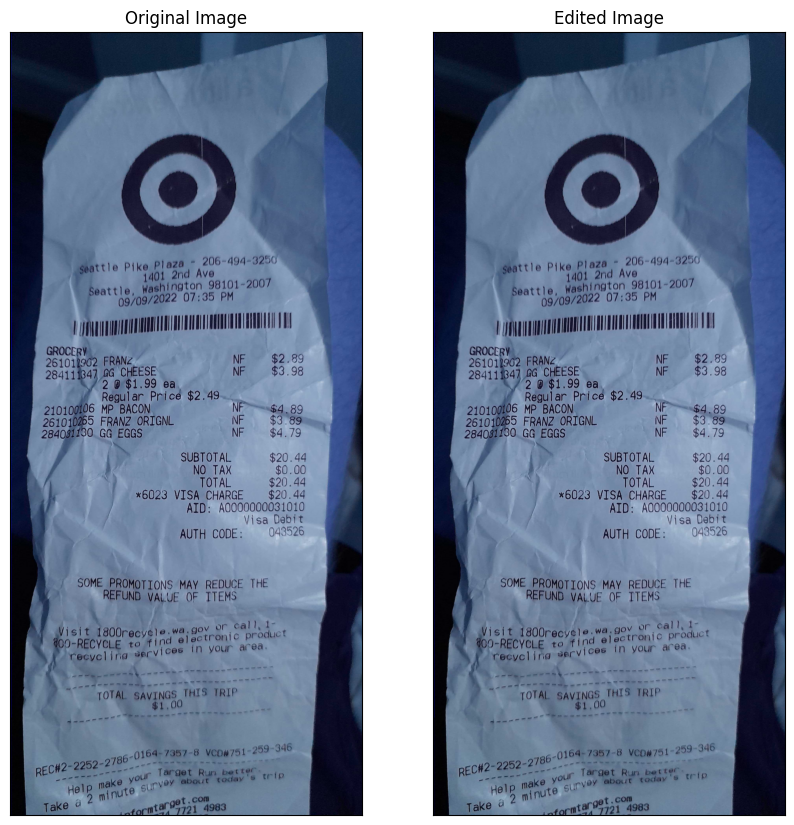

In [18]:
compareImages(img, img)